In [136]:
import pandas as pd
import numpy as np
import datetime
import os.path
import csv
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

# Read CSV that lists Ticker Composition by year

In [110]:
tech_csv = Path("./TechnologySectorTickers-between-2015-2018.csv")
tech_tickers_df = pd.read_csv(tech_csv)
tech_tickers_df.head()
#tech_tickers_df['2015']

,2015,2016,2017,2018
0,AAOI,AAOI,AAOI,AAOI
1,AAPL,AAPL,AAPL,AAPL
2,ACIW,ABTL,ACIA,ACIA
3,ACLS,ACIA,ACIW,ACIW
4,ACN,ACIW,ACLS,ACLS


# Read in Ticker Data from CSV

In [111]:
monthly_csv = Path("./aggregatedata.csv")
#monthly_df 
all_prices_df = pd.read_csv(monthly_csv, parse_dates=True, infer_datetime_format=True)

# Dictionary to hold TOP DOGS

In [112]:
# top_dogs = {
#     "year": {
#     "tickers" : [],
#     "pct_return": ""
#   },
# }

top_dogs = {}

# Get tickers for years

In [127]:
def get_tickers_for_years(years,sector):
    """pass me a list of years [2013,2015,...], and right, ZERO parameter or error checking"""
    tech_csv = Path(f"./{sector}SectorTickers-between-2015-2018.csv")
    #print(type(years))
    tech_tickers_df = pd.read_csv(tech_csv)
    #print(tech_tickers_df.head())
    all_tickers = []
    
    for year in years:
        #print(type(year))
        ticker_list = tech_tickers_df[year].tolist()
        ticker_list = [x for x in ticker_list if str(x) != "nan"]
        all_tickers.extend(ticker_list)
    
    return np.array(all_tickers)

In [126]:
tickers = get_tickers_for_years(['2015','2016','2017','2018'],'Technology')
print(tickers)

['AAOI' 'AAPL' 'ACIW' ... 'ZEN' 'ZIXI' 'ZS']


# Calculate the top performing tickers in range

In [115]:
def combined_df_for_timeframe(all_prices_df,ticker_list,day_start,day_end,sector):
    """Explain what I do here ;) """
    top_dogs = None
    
    range_df = all_prices_df[(all_prices_df['Date'] > day_start) & (all_prices_df['Date'] < day_end)]

    # Create empty dataframe with dates
    prices_df = range_df[range_df['Ticker']=='A']
    prices_df = prices_df[['Date','Adj Close']].copy()
    prices_df = prices_df.drop(columns=["Adj Close"])
    prices_df = prices_df.set_index('Date')
    
    for ticker in ticker_list:
        if ticker in ticker_list:
            # I can't say I understand this bit... [Will]
            ticker_df = range_df[range_df['Ticker']==ticker]
            ticker_df = ticker_df[['Date', 'Adj Close']].copy()
            ticker_df = ticker_df.rename(columns={'Adj Close':ticker})
            ticker_df = ticker_df.set_index('Date')
            prices_df = pd.concat([prices_df, ticker_df], axis="columns", sort=True)
            
    return prices_df

# Execute the function

In [116]:
start = '2015-01-01'
end   = '2017-12-31'
tickers = get_tickers_for_years(['2015','2016','2017'])
all_prices_df = pd.read_csv(monthly_csv, parse_dates=True, infer_datetime_format=True)
results_df = combined_df_for_timeframe(all_prices_df,tickers,start,end,None)
results_df.head()

,AAOI,AAPL,ACIW,ACLS,ACN,ACTA,ACXM,ADBE,ADI,ADP,...,XPER,XRX,YELP,YEXT,Z,ZBRA,ZEN,ZG,ZIXI,ZNGA
2015-01-02,10.79,100.755898,19.709999,10.20,80.515182,NaN,NaN,72.339996,49.634590,74.909462,...,30.498085,32.851536,55.150002,NaN,NaN,77.430000,24.570000,32.329281,3.55,2.73
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02,8.71,109.326523,18.799999,9.84,77.787247,NaN,NaN,71.110001,46.739082,75.044365,...,32.114559,31.967535,53.470001,NaN,NaN,84.070000,23.450001,29.756783,3.52,2.57
2015-03-02,13.27,119.435738,20.469999,11.52,82.635902,NaN,NaN,79.790001,53.784683,81.106209,...,36.233646,32.445374,47.860001,NaN,NaN,91.800003,24.110001,35.703148,4.01,2.32


# Calc percentage Change, and return TOP 10

In [117]:
def top_10_df(df):
    pct_change = df.pct_change()
    cumulative_returns = (1+pct_change).cumprod() -1
    cum_returns = cumulative_returns.tail(1).T
    column = cum_returns.columns[-1]
    top = cum_returns.sort_values(by=column,ascending=False)
    top = top.drop_duplicates()
    top = top.head(10)
    top = top.reset_index()
    return top

In [118]:
top10 = top_10_df(results_df)
top10

,index,2017-12-04
0,BKI,902.000017
1,NVDA,9.118282
2,FIVN,4.378619
3,USAT,4.216049
4,COHR,3.826167
5,EBIX,3.713580
6,AAOI,3.020389
7,AMD,3.018726
8,MRCY,2.990307
9,TTWO,2.941637


# Now generate with top 10 tickers only

In [119]:
top_tickers = []
top_tickers = top10['index'].tolist()
top_tickers

['BKI', 'NVDA', 'FIVN', 'USAT', 'COHR', 'EBIX', 'AAOI', 'AMD', 'MRCY', 'TTWO']

In [120]:
top_start = '2018-01-01'
top_end   = '2018-12-31'
top_dog_portfolio = combined_df_for_timeframe(all_prices_df,top_tickers,top_start,top_end,None)
top_dog_portfolio

,BKI,NVDA,FIVN,USAT,COHR,EBIX,AAOI,AMD,MRCY,TTWO
Date,,,,,,,,,,
2018-01-02,45.849998,198.168060,23.950001,9.750000,291.290009,76.536530,37.910000,10.980000,50.200001,112.879997
2018-02-01,49.549999,239.074081,25.900000,8.300000,254.929993,82.282967,33.490002,13.250000,48.220001,124.639999
2018-03-01,47.849998,230.976700,30.340000,8.050000,209.380005,82.355759,27.820000,11.900000,45.950001,107.540001
2018-04-02,46.900002,219.875946,28.809999,8.550000,185.979996,72.836014,24.020000,9.530000,47.970001,95.919998
2018-05-01,48.900002,225.933609,30.059999,8.900000,176.119995,77.645470,31.530001,11.130000,32.450001,104.300003
2018-06-01,50.700001,256.410187,35.599998,13.350000,166.580002,74.348343,45.020000,14.400000,37.200001,114.589996
2018-07-02,53.700001,241.102402,35.320000,13.900000,152.300003,77.524773,45.980000,15.160000,38.540001,119.870003
2018-08-01,52.349998,245.312561,32.889999,13.750000,179.250000,78.765564,37.400002,18.480000,48.799999,112.239998
2018-09-04,53.900002,282.522156,48.470001,16.200001,191.029999,76.952652,36.720001,28.059999,54.599998,134.529999


In [121]:
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
portfolio_monthly = top_dog_portfolio.dot(weights)
portfolio_one = (1+ portfolio_monthly).cumprod() -1
portfolio_one

Date
2018-01-02    8.575146e+01
2018-02-01    7.716731e+03
2018-03-01    6.268042e+05
2018-04-02    4.703495e+07
2018-05-01    3.560401e+09
2018-06-01    2.913115e+11
2018-07-02    2.340388e+13
2018-08-01    1.940739e+15
2018-09-04    1.810680e+17
2018-10-01    1.624530e+19
2018-11-01    1.181742e+21
2018-12-03    7.774477e+22
dtype: float64

In [122]:
final_return = portfolio_one.tail(1)
final_return

Date
2018-12-03    7.774477e+22
dtype: float64

In [144]:
def top_10_returns(df,sector,year):
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    portfolio_monthly = top_dog_portfolio.dot(weights)
    portfolio_one = (1+ portfolio_monthly).cumprod() -1
    plt.plot(portfolio_one)
    plt.xlabel('Time')
    plt.title(f"{sector} 'Top Dog' returns for {year}")
    plt.ylabel('Percent Change')
    plt.savefig(f"{sector}_top_dog_returns{year}.png")
    portfolio_one = portfolio_one.tail(1)
    portfolio_one = pd.DataFrame(portfolio_one)
    portfolio_one = portfolio_one.reset_index(drop=True)
    portfolio_one = portfolio_one.rename(columns={0:'Annual Return'})
    portfolio_one['Sector'] = sector
    portfolio_one['Year'] = year
    portfolio_one['Portfolio']= f"{sector} 'Top Dog' for year ending {year}"
    IT_csv = Path(f"./top_{sector}.csv")
    portfolio_one.to_csv(path_or_buf=IT_csv, index=False)
    return portfolio_one

# Now let's wrap it all up!!

## go ahead and grab all ticker data for all sectors

In [145]:
monthly_csv = Path("./aggregatedata.csv")
all_prices_df = pd.read_csv(monthly_csv, parse_dates=True, infer_datetime_format=True)

## Now Loop through sectors

Calculating Top Portfolio for Technology for year end 2017-12-31
Calculating Top Portfolio for Financials for year end 2017-12-31
Calculating Top Portfolio for HealthCare for year end 2017-12-31


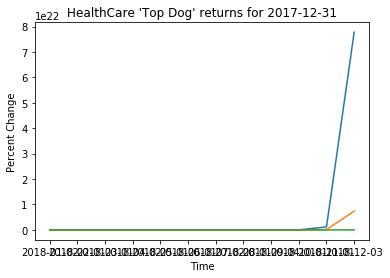

In [146]:
sectors = ['Technology','Financials','HealthCare']
start = '2015-01-01'
year_end   = '2017-12-31'
year,month,day = end.split('-')

# Loop through sectors, to find top dogs by sector
for sector in sectors:
    print(f"Calculating Top Portfolio for {sector} for year end {year_end}")
    sector_csv = Path(f"./{sector}SectorTickers-between-2015-2018.csv")
    sector_tickers_df = pd.read_csv(tech_csv)
    tickers = get_tickers_for_years(['2015','2016','2017'], sector)
    results_df = combined_df_for_timeframe(all_prices_df,tickers,start,end,sector)
    top10 = top_10_df(results_df)
    top_tickers = []
    top_tickers = top10['index'].tolist()
    top_dog_portfolio = combined_df_for_timeframe(all_prices_df,top_tickers,top_start,top_end,sector)
    #print(top_dog_portfolio.plot( title=f"{sector} Portfolio Performance for {year_end}" )   )
    top_10_returns(top_dog_portfolio,sector,year_end)